# Data Science Challenge Shopify
## Abhinav Sattiraju

### Part 1

##### Steps:
1. Perform operations to confirm the AOV given in the prompt
2. Explain why another metric is needed
3. Perform operations to yield that metric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


Each transaction / order is one entry, so to find the AOV, we simply sum the order_amount column and divide by the number of entries:

In [5]:
df['order_amount'].sum() / len(df) # AOV

3145.128

#### A) The problem with this metric is that the order_amount feature is highly skewed to the right with many outliers of large value, and this is visible both from the boxplot on the left of the entire feature and the boxplot on the right of the feature after filtering for the largest extraneous values. Therefore, reporting the AOV isn't a representative metric of the data.

<AxesSubplot:xlabel='order_amount'>

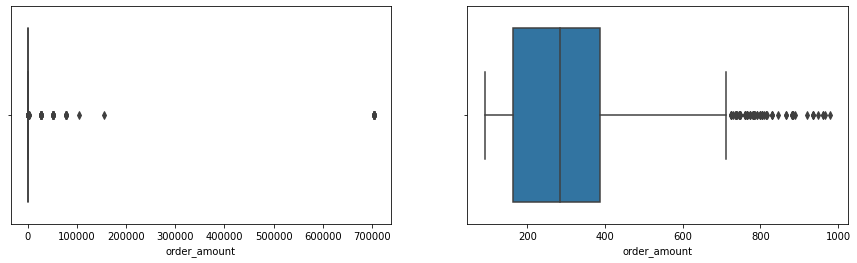

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))
sns.boxplot(x = df['order_amount'],ax=ax[0])
filtered_order = df[df['order_amount'] < 1000]['order_amount']
sns.boxplot(x = filtered_order,ax=ax[1])

#### B) Especially in the shoe industry, users would like to know prices for the shoes. I would find the metric describing the distribution of shoe prices across the 100 stores to be useful, because it would give indication about what to expect across stores. Reporting the actual distribution of average shoe prices across stores would also be useful because since each store sells a unique shoe, the distribution could give us key insight on the priciest and cheapest models available. It seems important to take advantage of the uniqueness of each store.

In [8]:
prices = df.groupby('shop_id').sum()[['order_amount','total_items']] # display totals across 30 days for each shop
prices

,order_amount,total_items
shop_id,,
1,13588,86
2,9588,102
3,14652,99
4,13184,103
5,13064,92
...,...,...
96,16830,110
97,15552,96
98,14231,107


We can find the "average" shoe price for each store by dividing order_amount / total_items:

In [9]:
prices['price'] = prices['order_amount'] / prices['total_items']
prices

,order_amount,total_items,price
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


<AxesSubplot:xlabel='price'>

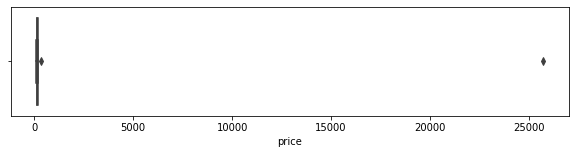

In [10]:
plt.figure(figsize=(10,2))
sns.boxplot(x=prices['price'])

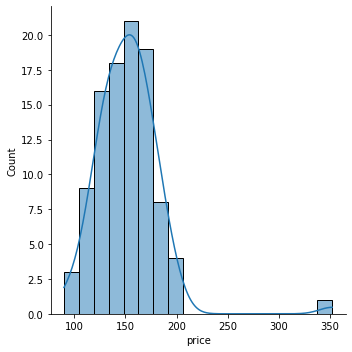

In [11]:
sns.displot(prices[prices['price'] < 20000]['price'], kde=True)

You can see that there is one extremely large outlier, representing a potentially rare or most valuable model / brand sold by the certain store. There is another smaller outlier on the higher end, but otherwise, the distribution of prices has a roughly bell shaped curve.

#### C) For this distribution, I will report the median of the average prices for shoes across all stores, and the above two images would be useful in reporting the actual distribution. The median is:

In [12]:
prices['price'].median() # $153 is the median of average prices of shoes sold across all stores

153.0

### Part 2

In [13]:
# a)

# WITH ORDER_SHIPPERS AS 
# (
#     SELECT * FROM [Orders] AS o
#     INNER JOIN [Shippers] AS s
#     ON o.ShipperID = s.ShipperID
# )
# SELECT COUNT(ShipperID) FROM ORDER_SHIPPERS WHERE ShipperName = 'Speedy Express'


# Answer: 54

In [14]:
# b)

# WITH EMPS AS
# (
#   WITH EMP_ORDERS AS 
#   (
#     SELECT o.OrderID, o.EmployeeID, e.LastName FROM [Orders] AS o
#     INNER JOIN [Employees] AS e
#     ON o.EmployeeID = e.EmployeeID
#   )
#   SELECT LastName, COUNT(OrderID) AS Count
#   FROM EMP_ORDERS GROUP BY LastName
# )
# SELECT LastName, MAX(Count) FROM EMPS

# Answer: Peacock

In [15]:
# C)

# WITH Germans AS (
#     SELECT CustomerID FROM [Customers] WHERE Country = 'Germany'
# ),
# Ords AS (
#     SELECT g.CustomerID, o.OrderID FROM Germans as g
#     INNER JOIN [Orders] as o
#     ON g.CustomerID = o.CustomerID
# ),
# Dets AS (
#     SELECT o.CustomerID, o.OrderID, d.ProductID FROM Ords as o
#     INNER JOIN [OrderDetails] as d
#     ON o.OrderID = d.OrderID
# ),
# Names AS (
#     SELECT d.CustomerID, p.ProductName FROM Dets as d
#     INNER JOIN [Products] as p
#     ON d.ProductID = p.ProductID
# ),
# Final AS (
#     SELECT ProductName, COUNT(ProductName) AS Count FROM Names GROUP BY ProductName
# )
# SELECT ProductName, MAX(Count) FROM Final

# Answer: Gorgonzola Telino